In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

###MNIST


In [ ]:
mnist_dataset = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_dataset.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels.shape

(60000,)

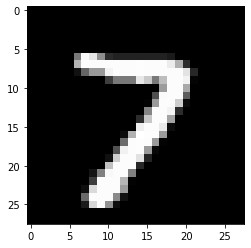

In [ ]:
#visaulizanod una imag4en de data set
plt.imshow(np.squeeze(train_images[4000]), cmap='gray')

In [ ]:
#normalizar las  imgaenes
train_imagesN = train_images/255.0
test_imagesN = test_images/255.0

In [ ]:
#crear el modelo o la red

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.python import metrics    #compilar
opt = keras.optimizers.Adam(learning_rate = 0.01)

model.compile(optimizer = opt,
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])

In [ ]:
model.fit(train_imagesN, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2410 - accuracy: 0.9292
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1590 - accuracy: 0.9550
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1441 - accuracy: 0.9614
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1266 - accuracy: 0.9660
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1251 - accuracy: 0.9675
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1108 - accuracy: 0.9707
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1059 - accuracy: 0.9732
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1132 - accuracy: 0.9721
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1007 - accuracy: 0.9743
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.09

In [ ]:
test_loss, test_acc = model.evaluate(test_imagesN, test_labels)
print('acurracy de Testeio: ', test_acc)
print('loss de testeo', test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.2367 - accuracy: 0.9610
acurracy de Testeio:  0.9610000252723694
loss de testeo 0.23668843507766724


In [ ]:
#prueba

In [ ]:
num = 850

In [ ]:
test_labels[num]

1

In [ ]:
test_imagesN[num].shape

(28, 28)

In [ ]:
prueba = test_imagesN[num].reshape(1,28,28)

In [ ]:
ypred=model.predict(prueba)
ypred

1/1 [==============================] - 0s 88ms/step


array([[3.5569197e-36, 1.0000000e+00, 3.9863908e-20, 2.3293054e-29,
        3.0211571e-16, 8.8360002e-20, 6.5466304e-18, 6.7268367e-15,
        2.7551683e-20, 4.2227986e-23]], dtype=float32)

In [ ]:
ypred.argmax()  #devuelve la pososion del mayor valor de un vector

1

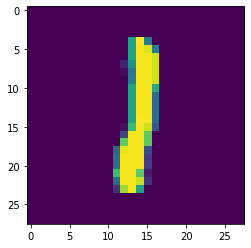

In [ ]:
plt.imshow(test_images[num])